# ANNs (Artificial Neural Net)

## Keras sequential model

The sequential model is a linear stack of layers.

In [ ]:
#!pip install keras
#!pip install tensorflow
# Run the commands above if you do not have keras installed

# Layers in an ANN

ANNs are typically organised in layers. Different types include:

- Dense (fully connected) layers
- Convolutional layers (image data)
- Pooling layers 
- Recurrent layers (time series data)
- normalization layers
- Others


## Layers

Each input node receives a feature from each sample. Each input is connected to the next layer. A connection will have a weight - and the signal received at a node is the weighted sum of the input, passed through an activation function which coverts the signal to something between zero and one. Weights of each connection change to optimize the output.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
model = Sequential([
    Dense(units=5, input_shape=(3,), activation='relu'),
    Dense(units=2, activation='softmax')
])

# 'model' is an instance of a Sequential object
# we pass an array of Dense objects to the constructor
# These are layers of our neural network
# the first parameter 'units' describes how many nodes/neurons are within the layer
# input_shape tells us how many neurons our input layer has


In [4]:
#model = Sequential()
#model.add(Dense(units=5, input_shape=(3,))
#model.add(Activation='relu')

#These lines are equivalent to the first Dense object in the code cell above

In [5]:
from IPython.display import SVG, display

### This is the exact representation of the model I just made above

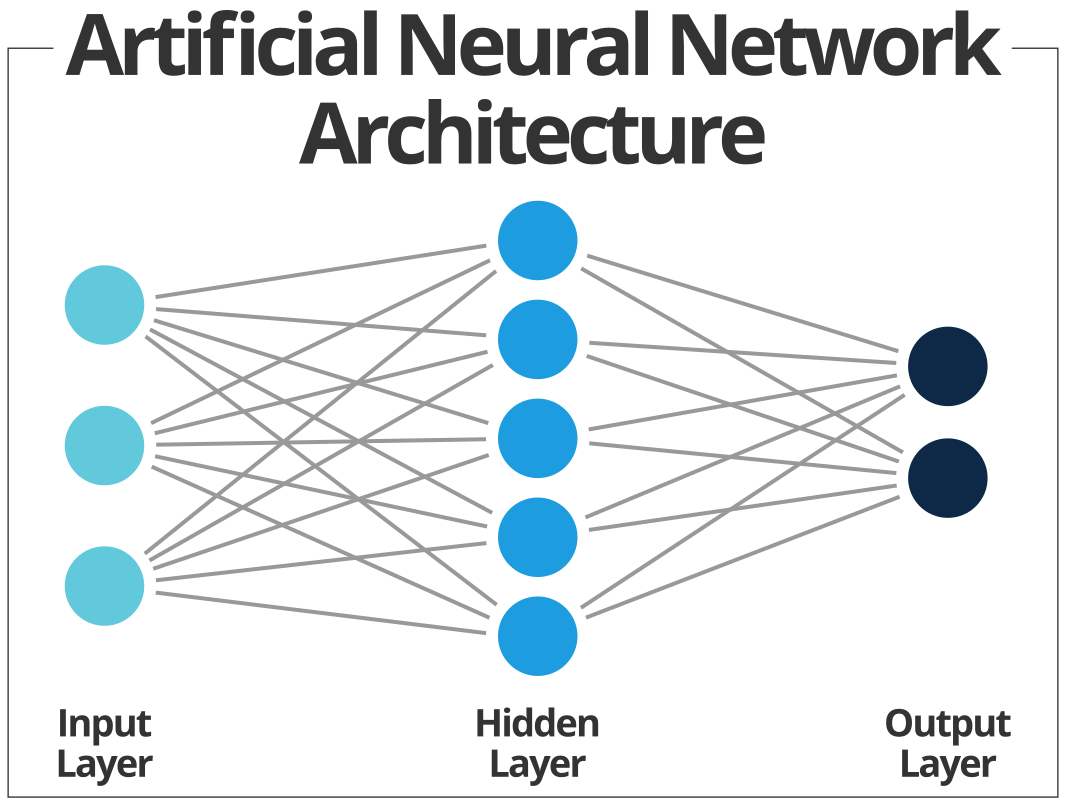

In [6]:
display(SVG('NN.svg'))

# Activation functions

In an ANN, an activation function of neuron defines the output of that neuron, given a set of inputs.

An example is a sigmoid - it converts very negative inputs close to zero and very large inputs close to one everything between lies in this boundary. It is inspired by neurons in your brain - neurons firing can be represented by 1 and 0 when it doesn't.

Another example is 'Relu' which converts negative inputs to zero and keeps all other inputs the same.


# Training

Solving an optimization problem - optimizing the weights on each connection in order to achieve the best output.

- Well known optimizer is called Stochastic Gradient Descent (SGD)
- Which aims to minimize loss function (common one being mean squared error)


# Learning

- A single pass of data through model is an epoch


- First arbitrary weights
- Give output and loss
- Compute gradient of loss function d(loss)/d(weight) calculated using "backpropagation"
- Multiplied by learning rate
- Update initial weight with new vaue (this happens with all weights)


In [7]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [13]:
model = Sequential([
    Dense(15, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [14]:
model.compile(Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.loss = 'sparse_categorical_crossentropy'
#model.optimizer.learning_rate = 0.0001
#Adam is our optimizer
#learning rate is used to define the new weight. It defines how large a step we take in the direction of the minimum
#typically given between 0.0001 and 0.01
# new weight = old weight - (learning rate * gradient)

In [15]:
#model.fit(random_data_samples, training_labels, validation_split=0.20, batch_size=10, epochs=20, shuffle=True, verbose=2)

#The first argument should be a numpy array of the data, and the second argument should be a numpy array containing 
#the labels of the data
#How many pieces of data to be sent to the model at once
#Epochs is how many times the entire data set is passed through the model
#Shuffles data with each epoch
#verbose determines how much data is displayed
#validation_split tells Keras what proportion of the training data to seperate out into a validation set
#we could use validation_data instead if we already had a premade array of validation data (list of tuples - (sample, label))

# Loss 

- Calculates the difference between the output and label
- The errors are stored and put into a loss function
- Example could be MSE (mean squared error)
- which is sum of all errors squared divided by number of errors


# Data sets

There are three main data sets used for training a new model. These are the training set, the validation set and the test set.

- The training data is used to teach the model as described in previous parts of this notebook
- The validation data is run through the model at the same time, except errors from this data sets are not used to update the weights
- Validation set is used for making sure we don't overfit
- Test set is unlabelled as it is used to test the model on previously "unseen" data

# Predictions

In [16]:
#predictions = model.predict(test_samples, batch_size=10, verbose=0)

# Overfitting

- Overfitting occurs when our model is fit too rigidly to our training data
- This often means the accuracy of the model when classifying the training data is high
- but also usually the accuracy of the model for the validation set or test set is low
- We can prevent this by:
- Adding more data to training set
- Data Augmentation (replicating data but with slight aadjustments)
- Reduce complexity of model e.g. removing some layers in model
- "Dropout", stops some nodes from effecting predictions


# Underfitting

- Occurs when the model has bad accuracy for the training data
- Increase complexity of model e.g. add more layers, add more nodes to each layer
- Add more features to training set
- Reduce dropout


# Learning

- Unsupervised
- Supervised
- Semi - supervised


## Unsupervised learning

- Gets data and tries to learn some sort of "structure" of the data
- One example is clustering algorithms, where groups of similar data are grouped into seperate clusters
- Auto encoders
- Auto encoders work by encode the data and then attempt to decode the data and try to reconstruct the original data
- The loss can be determined by finding difference between original and reconstructed
- Used for getting rid of noise in data


## Semi - supervised learning

- This is a combination of the two other methods above.
- First, use part of the data set, and conduct supervised learning on the model, identical to supervised learning
- We don't label all the data as this might take too long
- Once we have achieved a good match on the training set, we can then pass the other not labelled data into the model for unsupervised learning
- During this process, the model "guesses" the labels and these labels are called "pseudo-labels"
- After this has completed, we have a full data set of labelled data
- The whole data set is now passed through the model

In [17]:
# Let us take a look at some data for supervised learning

train_samples = [[150,67], [130,60], [200,65], [125,32], [230,72], [181,70]]

train_labels = [1, 1, 0, 1, 0, 0]

model.fit(x=train_samples, y=train_labels, batch_size=1, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
6/6 - 9s - loss: 18.4482 - accuracy: 0.5000
Epoch 2/10
6/6 - 0s - loss: 18.0200 - accuracy: 0.5000
Epoch 3/10
6/6 - 0s - loss: 17.3058 - accuracy: 0.5000
Epoch 4/10
6/6 - 0s - loss: 16.8004 - accuracy: 0.5000
Epoch 5/10
6/6 - 0s - loss: 16.2156 - accuracy: 0.5000
Epoch 6/10
6/6 - 0s - loss: 15.7623 - accuracy: 0.5000
Epoch 7/10
6/6 - 0s - loss: 15.1309 - accuracy: 0.5000
Epoch 8/10
6/6 - 0s - loss: 14.5468 - accuracy: 0.5000
Epoch 9/10
6/6 - 0s - loss: 14.0182 - accuracy: 0.5000
Epoch 10/10
6/6 - 0s - loss: 13.6058 - accuracy: 0.5000


# Data Augmentation

- We can increase the size of our training set using the following methods:
- Flipping the image
- Rotating the image
- Zooming in or out of the image
- Cropping the image
- Varying the color on the image

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
%matplotlib inline

In [20]:
# Function for plotting labelled images in Jupyter notebook, code sampled from https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [21]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)

In [22]:
image_path = 'timmy.jpeg'

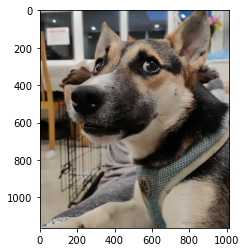

In [32]:
image = np.expand_dims(mpimg.imread(image_path),0)
plt.imshow(image[0])

In [42]:
aug_iter = gen.flow(image)

In [43]:
print(type(aug_iter))

<class 'keras.preprocessing.image.NumpyArrayIterator'>


In [44]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

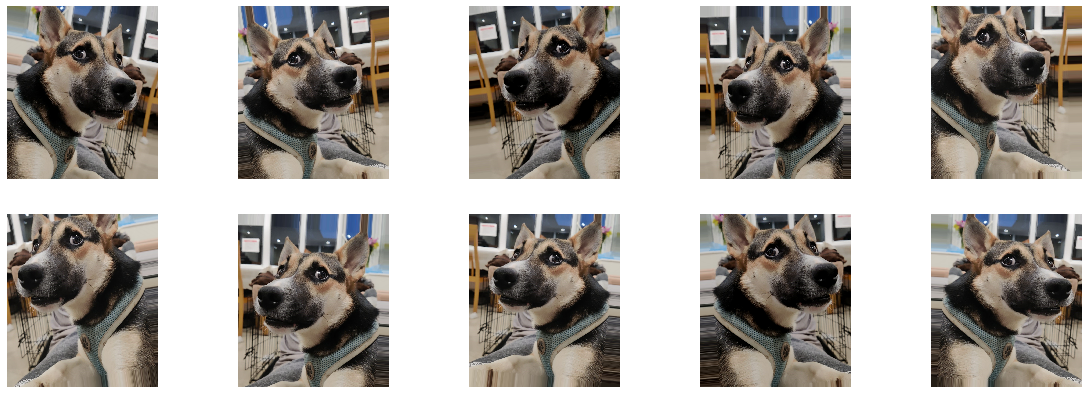

In [45]:
plots(aug_images, figsize=(20,7), rows=2)

# One Hot Encoding

- Where the labels of data are "encoded" into an integer, or a vector of integers
- For example, for a model that is classifying cats and dogs, dogs could be a "1" and cats could be "0"
- One hot coding is an example of a type of encryption
- It transforms labels into a vector of zeroes and ones, the length of the vector is equal to the number of classes/categories our model is expected to classify
- each value in the vector corresponds to its own class, and it will be a "1" for the class and zero for every other class.

Labels can be viewed using ".class_indices"

# Convolutional Neural Networks
## (ConvNet)

- Pattern detection
- Image analysis
- Convolutional layers, each layer has a number of filters
- For example, take a look at the hand written numbers data set.
- Each seperate image on this data set will be represented by a grid of values.
- Lets say that our "filter" is a 2 by 2 matrix.
- In that case, the CNN would dot product our filter matrix with every single 2 by 2 grid on the image to produce a new grid of values, and this will be stored
- The process of using the "filter" on the grid of value is called "convolving"
- This process is repeated for other layers
- This allows the network to slowly be able to identify very complex objects

## Visualizing Convolutional filters from a CNN

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

- Link above is a blog from creator of Keras explaining how to visualize convolutional filters 

# Zero Padding

- After convolving an image, we lose some data around the edges of the image, as a feature of convolution is that it reduces the dimensions of the image
- This can be very dangerous because we risk losing potentially important data around the edges.
- This can be solved by zero padding. It involves "padding" the edges of images using a border of zeroes such that after convolution, no data is lost.

- We use "valid" as a term meaning no padding was used, and "same" means that the exact right amount of padding such that the output is the same dimension as the input

for a n by n image using a f by f filter, the output size is (n-f+1)(n-f+1)

Keras defaults to "valid"

In [46]:
from keras.layers.core import Flatten
from keras.layers.convolutional import *

In [52]:
model = Sequential([
    Dense(units=20, input_shape=(30,30,3), activation='relu'),
    Conv2D(40, kernel_size=(3,3), activation='relu', padding='valid'),
    Conv2D(80, kernel_size=(5,5), activation='relu', padding='valid'),
    Conv2D(160, kernel_size=(7,7), activation='relu', padding='valid'),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [53]:
model.summary()

# as we can see, using "valid" padding, the output size shrinks

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30, 30, 20)        80        
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 40)        7240      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 80)        80080     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 160)       627360    
_________________________________________________________________
flatten (Flatten)            (None, 51840)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 103682    
Total params: 818,442
Trainable params: 818,442
Non-trainable params: 0
________________________________________________

In [54]:
model = Sequential([
    Dense(units=20, input_shape=(30,30,3), activation='relu'),
    Conv2D(40, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(80, kernel_size=(5,5), activation='relu', padding='same'),
    Conv2D(160, kernel_size=(7,7), activation='relu', padding='same'),
    Flatten(),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30, 30, 20)        80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 40)        7240      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 80)        80080     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 160)       627360    
_________________________________________________________________
flatten_1 (Flatten)          (None, 144000)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 288002    
Total params: 1,002,762
Trainable params: 1,002,762
Non-trainable params: 0
____________________________________________